In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')

## Read data
We will analyze the titles of a great number of papers in the data science and artificial intelligence community. All the data has been preprocessed as a .csv-file (Excel file)

In [5]:
# Read Excel file or .csv file
papers = pd.read_csv('papers.csv')

# Display first five rows
papers.head(5)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [16]:
papers["paper_text"].iloc[0]

/home/vws/anaconda3/envs/course/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABASE\nAND ITS APPLICATIONS\nHisashi Suzuki and Suguru Arimoto\nOsaka University, Toyonaka, Osaka 560, Japan\nABSTRACT\nAn efficient method of self-organizing associative databases is proposed together with\napplications to robot eyesight systems. The proposed databases can associate any input\nwith some output. In the first half part of discussion, an algorithm of self-organization is\nproposed. From an aspect of hardware, it produces a new style of neural network. In the\nlatter half part, an applicability to handwritten letter recognition and that to an autonomous\nmobile robot system are demonstrated.\n\nINTRODUCTION\nLet a mapping f : X -+ Y be given. Here, X is a finite or infinite set, and Y is another\nfinite or infinite set. A learning machine observes any set of pairs (x, y) sampled randomly\nfrom X x Y. (X x Y means the Cartesian product of X and Y.) And, it computes some\nestimate j : X -+ Y of f to make small, the estimation erro

In [18]:
# Stopwords are words such as "of", "to", pronouns and abbreviations such as "et c."
# They add no topic information
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["based", "using", "via"])
escapes = ''.join([chr(char) for char in range(1, 32)])

# The titles are tokenized, split into morphemes, lexemes or in this case words
# This specific tokenizer handles compound words
# Add common compounds
compounds = [("artificial", "intelligence"), 
            ("data", "science"), 
            ("neural", "network"), 
            ("gradient", "descent"), 
            ("mean", "field"), 
            ("cross", "validation"),
            ("neural", "net"),
            ("reinforcement", "learning"),
            ("machine", "learning"),
            ("bayesian", "inference")]

tokenizer = nltk.tokenize.MWETokenizer(compounds, separator=' ')

# We will also add lemmatization, only using the root in common words
lemmatizer = nltk.stem.WordNetLemmatizer()

# We map (apply to each row in the database) filters removing punctuations and stopwords
papers["title_filter"] = papers["paper_text"].map(lambda x: re.sub('[:,\.!?]', '', x))\
                                        .map(lambda x: [w.lower() for w in x.split(" ")])\
                                        .map(lambda x: [lemmatizer.lemmatize(w) for w in x] )\
                                        .map(lambda x: tokenizer.tokenize(x))\
                                        .map(lambda x: [w for w in x if w not in escapes])\
                                        .map(lambda x: [w for w in x if w not in stopwords])

/home/vws/anaconda3/envs/course/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:27: DeprecationWarning: invalid escape sequence \.
/home/vws/anaconda3/envs/course/lib/python3.8/asyncio/events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)
<ipython-input-18-3baba7a00c81>:27: DeprecationWarning: invalid escape sequence \.
  papers["title_filter"] = papers["paper_text"].map(lambda x: re.sub('[:,\.!?]', '', x))\


In [19]:
from itertools import chain

# Create a big list of all the words in the titles
title_list =  [w for w in chain(*papers["title_filter"])]

/home/vws/anaconda3/envs/course/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/vws/anaconda3/envs/course/lib/python3.8/asyncio/events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


/home/vws/anaconda3/envs/course/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


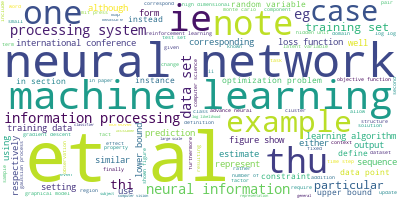

In [20]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(title_list)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

## Topic modelling
We will now try to identify if there are any common cluster of terms that go together. So called topics. This is an automated way to get an overview of a document or number of documents.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(papers["title_filter"].map(lambda x: " ".join(x)))

/home/vws/anaconda3/envs/course/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 5
lda = LDA(n_components=n_topics).fit(X)


/home/vws/anaconda3/envs/course/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [23]:
display_topics(lda, vectorizer.get_feature_names(), 10)

/home/vws/anaconda3/envs/course/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
model the distribution data state function learning algorithm in of
Topic 1:
the matrix network algorithm method problem function of 10 learning
Topic 2:
the model network time of input neuron neural figure system
Topic 3:
the image feature data model learning training set object of
Topic 4:
the algorithm function bound set problem learning in of theorem


In [24]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, X, vectorizer)

/home/vws/anaconda3/envs/course/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.095065  0.030274       1        1  25.063000
0      0.025624  0.003135       2        1  21.540988
3     -0.019665 -0.101824       3        1  20.441784
2     -0.135137  0.043100       4        1  17.118170
1      0.034113  0.025316       5        1  15.836058, topic_info=           Term           Freq          Total Category  logprob  loglift
169352    image   45288.000000   45288.000000  Default  30.0000  30.0000
208121    model  142180.000000  142180.000000  Default  29.0000  29.0000
200772   matrix   49726.000000   49726.000000  Default  28.0000  28.0000
214375  network   68624.000000   68624.000000  Default  27.0000  27.0000
214757   neuron   19686.000000   19686.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
222847      one   10131.331094   65090.749369   Topic5  -5.7576  -0.0173
248993   result    9548.962899   54086.304772   Topic5  -5.8168   0.1087
147188      for    9524.442537   55061.545234   Topic5  -5.8194   0.0883
295219       we    9661.963792   65163.072950   Topic5  -5.8050  -0.0658
278775     time    9364.258509   66325.753040   Topic5  -5.8363  -0.1148

[529 rows x 6 columns], token_table=        Topic      Freq       Term
term                              
11745       1  0.220967         10
11745       2  0.242078         10
11745       3  0.176579         10
11745       4  0.133525         10
11745       5  0.226838         10
...       ...       ...        ...
307925      5  0.027504  zisserman
307937      3  0.994409    zitnick
308260      2  0.991064        znk
308260      3  0.004525        znk
308260      5  0.004525        znk

[1415 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 3, 2])

In [6]:
from collections import Counter
count   = Counter(title_list)
common  = dict(count.most_common(10))

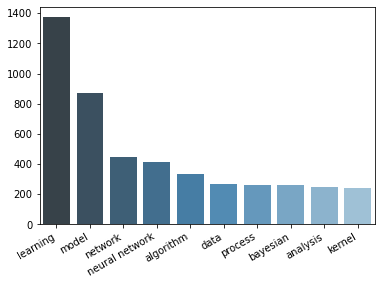

In [7]:
ax = sns.barplot(x = [*common.keys()], y = [*common.values()], palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha="right")
plt.show()

(array([ 285.,  414.,  450.,  453.,  499.,  612.,  628.,  804., 1034.,
        2062.]),
 array([1987., 1990., 1993., 1996., 1999., 2002., 2005., 2008., 2011.,
        2014., 2017.]),
 <a list of 10 Patch objects>)

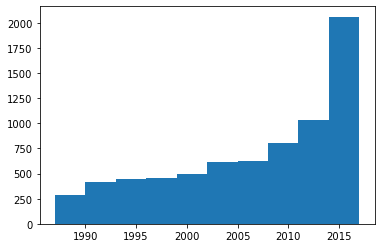